# 1. Read csv file

In [1]:
import pandas as pd

# خواندن فایل CSV و ذخیره در df
df = pd.read_csv("D:/FILES/amazon_reviews.csv")

# نمایش چند سطر اول برای بررسی داده‌ها
print(df[['reviewText', 'overall']].head(5))


                                          reviewText  overall
0                                         No issues.        4
1  Purchased this for my device, it worked as adv...        5
2  it works as expected. I should have sprung for...        4
3  This think has worked out great.Had a diff. br...        5
4  Bought it with Retail Packaging, arrived legit...        5


## Investigating Data

   overall  Count
2      1.0    244
4      2.0     80
3      3.0    142
1      4.0    527
0      5.0   3922


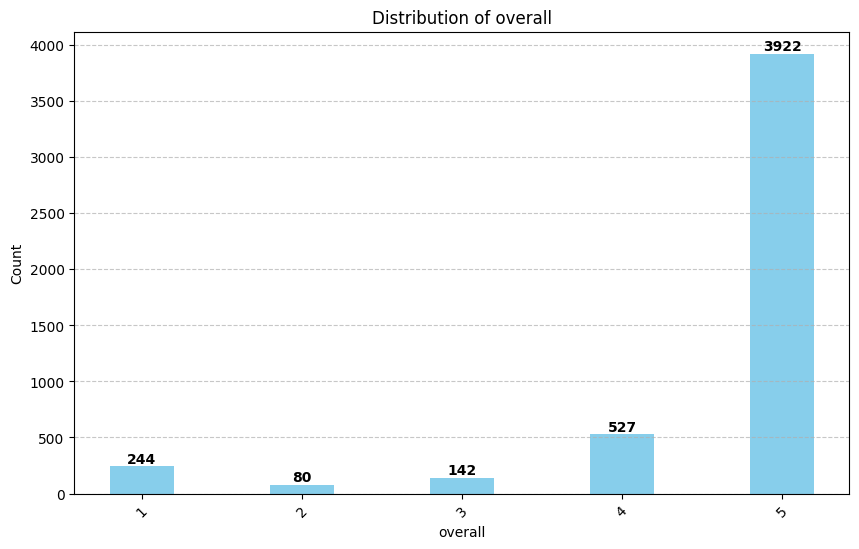

In [2]:
import matplotlib.pyplot as plt

# شمارش تعداد تکرار هر مقدار در ستون 'Rating' و مرتب‌سازی بر اساس مقدار Rating
rating_counts = df['overall'].value_counts().reset_index()
rating_counts.columns = ['overall', 'Count']

# تبدیل 'Rating' به عدد برای مرتب‌سازی صحیح
rating_counts['overall'] = rating_counts['overall'].astype(float)

# مرتب‌سازی بر اساس مقدار Rating
rating_counts = rating_counts.sort_values(by='overall')

# نمایش جدول تعداد تکرارها
print(rating_counts)

# رسم نمودار ستونی
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts['overall'], rating_counts['Count'], color='skyblue', width=0.4)

# اضافه کردن مقدار تعداد بالای هر ستون
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

# تنظیمات نمودار
plt.xlabel('overall')
plt.ylabel('Count')
plt.title('Distribution of overall')
plt.xticks(rotation=45)  # چرخش برچسب‌های محور افقی برای خوانایی بهتر
plt.grid(axis='y', linestyle='--', alpha=0.7)

# نمایش نمودار
plt.show()

## Adding Labels

In [2]:
# اضافه کردن ستون 'label' بر اساس مقدار 'Rating'
df['label'] = pd.cut(df['overall'], 
                               bins=[0, 2, 3, 5], 
                               labels=['negative', 'neutral', 'positive'], 
                               right=True)

# نمایش نتایج
print(df[['reviewText', 'overall', 'label']].head(5))

                                          reviewText  overall     label
0                                         No issues.        4  positive
1  Purchased this for my device, it worked as adv...        5  positive
2  it works as expected. I should have sprung for...        4  positive
3  This think has worked out great.Had a diff. br...        5  positive
4  Bought it with Retail Packaging, arrived legit...        5  positive


# 2. Preprocessing
## Text Cleaning

In [18]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# تابع برای حذف نویز (عددها، علائم نگارشی و فاصله‌های اضافی)
def clean_text(text):
    if isinstance(text, str):  # بررسی اینکه آیا ورودی از نوع رشته است
        # حذف عددها
        text = re.sub(r'\d+', '', text)
        # حذف علائم نگارشی
        text = re.sub(r'[^\w\s]', '', text)
        # حذف فاصله‌های اضافی
        text = re.sub(r'\s+', ' ', text).strip()
        # تبدیل متن به حروف کوچک
        text = text.lower()
        # حذف کلمات زائد (Stopwords)
        text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# اعمال پاکسازی بر روی ستون 'Content'
df['reviewText'] = df['reviewText'].apply(clean_text)

# نمایش دیتافریم بعد از اعمال تغییرات
print(df[['reviewText', 'overall', 'label']].head(5))


                                          reviewText  overall     label
0                                             issues      4.0  positive
1  purchased device worked advertised phone memor...      5.0  positive
2  works expected sprung higher capacity think bi...      4.0  positive
3  think worked greathad diff bran gb card went s...      5.0  positive
4  bought retail packaging arrived legit orange e...      5.0  positive


## Tokenize

In [19]:
import nltk
from nltk.tokenize import word_tokenize

# بارگذاری منابع لازم برای tokenization
nltk.download('punkt')

# تابع برای اعمال tokenization بر روی متن
def tokenize_text(text):
    if isinstance(text, str):  # بررسی اینکه آیا ورودی از نوع رشته است
        tokens = word_tokenize(text)  # انجام tokenization
        return tokens
    return []

# اعمال tokenization بر روی ستون 'Content'
df['review_Tokens'] = df['reviewText'].apply(tokenize_text)

# نمایش دیتافریم بعد از اعمال tokenization
print(df[['reviewText', 'review_Tokens']].head())


[nltk_data] Downloading package punkt to C:\Users\AFERI/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                          reviewText  \
0                                             issues   
1  purchased device worked advertised phone memor...   
2  works expected sprung higher capacity think bi...   
3  think worked greathad diff bran gb card went s...   
4  bought retail packaging arrived legit orange e...   

                                       review_Tokens  
0                                           [issues]  
1  [purchased, device, worked, advertised, phone,...  
2  [works, expected, sprung, higher, capacity, th...  
3  [think, worked, greathad, diff, bran, gb, card...  
4  [bought, retail, packaging, arrived, legit, or...  


## n-grams

In [21]:
from nltk.util import ngrams

# تابع برای تشکیل n-gram
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# اعمال Uni-gram (n=1) و Bi-gram (n=2) بر روی ستون 'Content_Tokens'
df['Uni-grams'] = df['review_Tokens'].apply(lambda tokens: generate_ngrams(tokens, 1))  # Uni-gram
df['Bi-grams'] = df['review_Tokens'].apply(lambda tokens: generate_ngrams(tokens, 2))  # Bi-gram

# نمایش دیتافریم بعد از اعمال n-grams
print(df[['review_Tokens', 'Uni-grams', 'Bi-grams']].head())


                                       review_Tokens  \
0                                           [issues]   
1  [purchased, device, worked, advertised, phone,...   
2  [works, expected, sprung, higher, capacity, th...   
3  [think, worked, greathad, diff, bran, gb, card...   
4  [bought, retail, packaging, arrived, legit, or...   

                                           Uni-grams  \
0                                        [(issues,)]   
1  [(purchased,), (device,), (worked,), (advertis...   
2  [(works,), (expected,), (sprung,), (higher,), ...   
3  [(think,), (worked,), (greathad,), (diff,), (b...   
4  [(bought,), (retail,), (packaging,), (arrived,...   

                                            Bi-grams  
0                                                 []  
1  [(purchased, device), (device, worked), (worke...  
2  [(works, expected), (expected, sprung), (sprun...  
3  [(think, worked), (worked, greathad), (greatha...  
4  [(bought, retail), (retail, packaging), (packa..

# 3. Sentiment Analysis

## VADAR Using Content

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AFERI/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                          reviewText  Positive_Score  \
0                                         No issues.           0.000   
1  Purchased this for my device, it worked as adv...           0.000   
2  it works as expected. I should have sprung for...           0.000   
3  This think has worked out great.Had a diff. br...           0.091   
4  Bought it with Retail Packaging, arrived legit...           0.127   

   Negative_Score  Neutral_Score  Compound_Score  
0           0.688          0.312         -0.2960  
1           0.075          0.925         -0.2960  
2           0.077          0.923         -0.3089  
3           0.000          0.909          0.7081  
4           0.038          0.835          0.7087  
                                          reviewText  Positive_Score  \
0                                         No issues.           0.000   
1  Purchased this for my device, it worked as adv...           0.000   
2  it works as expected. I should have sprung

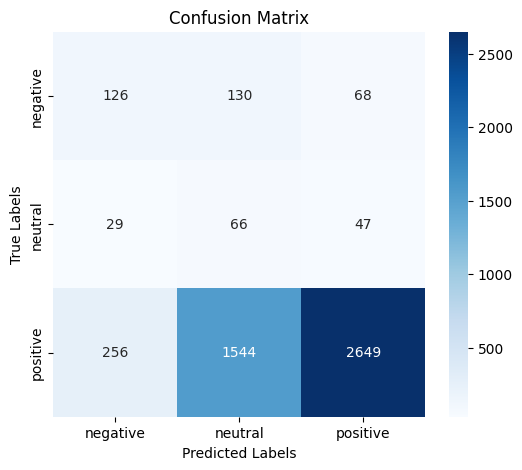

In [5]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# بارگذاری مدل VADER
nltk.download('vader_lexicon')

# ایجاد یک شیء از SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# تابع برای انجام تحلیل احساس
def analyze_sentiment(text):
    if isinstance(text, str):
        # تحلیل احساس متن با استفاده از VADER
        sentiment_score = sia.polarity_scores(text)
        return sentiment_score
    return {}

# اعمال تحلیل احساس بر روی ستون 'Content'
df['Sentiment'] = df['reviewText'].apply(analyze_sentiment)

# استخراج نمرات مثبت، منفی و خنثی از نتایج تحلیل
df['Positive_Score'] = df['Sentiment'].apply(lambda x: x.get('pos', 0))
df['Negative_Score'] = df['Sentiment'].apply(lambda x: x.get('neg', 0))
df['Neutral_Score'] = df['Sentiment'].apply(lambda x: x.get('neu', 0))
df['Compound_Score'] = df['Sentiment'].apply(lambda x: x.get('compound', 0))

# نمایش دیتافریم بعد از تحلیل احساس
print(df[['reviewText', 'Positive_Score', 'Negative_Score', 'Neutral_Score', 'Compound_Score']].head())

# اضافه کردن ستون 'VADER_SentimentAnalysis' بر اساس مقدار 'Compound_Score'
def get_vader_sentiment_analysis(compound_score):
    if compound_score < -0.5:
        return 'negative'
    elif compound_score > 0.5:
        return 'positive'
    else:
        return 'neutral'

df['VADER_SentimentAnalysis'] = df['Compound_Score'].apply(get_vader_sentiment_analysis)

# نمایش دیتافریم بعد از تحلیل احساس
print(df[['reviewText', 'Positive_Score', 'Negative_Score', 'Neutral_Score', 'Compound_Score', 'VADER_SentimentAnalysis']].head())

#  تعریف کلاس‌ها
labels = ['negative', 'neutral', 'positive']

# محاسبه معیارهای ارزیابی مدل
accuracy = accuracy_score(df['label'], df['VADER_SentimentAnalysis'])
recall = recall_score(df['label'], df['VADER_SentimentAnalysis'], average='weighted')
f1 = f1_score(df['label'], df['VADER_SentimentAnalysis'], average='weighted')

#  نمایش معیارها در قالب جدول
print("\n **Performance Metrics:**")
print(f"{'Metric':<12}{'Value':>8}")
print(f"{'-'*22}")
print(f"{'Accuracy':<12}{accuracy:.2f}")
print(f"{'Recall':<12}{recall:.2f}")
print(f"{'F1-Score':<12}{f1:.2f}")

#  محاسبه و نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(df['label'], df['VADER_SentimentAnalysis'], labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## TextBlob

                                          reviewText  Polarity_Score_TextBlob  \
0                                             issues                 0.000000   
1  purchased device worked advertised phone memor...                 0.000000   
2  works expected sprung higher capacity think bi...                 0.129167   
3  think worked greathad diff bran gb card went s...                 0.250000   
4  bought retail packaging arrived legit orange e...                 0.386667   

   Subjectivity_Score_TextBlob textblob_SentimentAnalysis  
0                        0.000                    neutral  
1                        0.000                    neutral  
2                        0.525                   positive  
3                        1.000                   positive  
4                        0.360                   positive  
Accuracy: 0.72
Recall: 0.72
F1-score: 0.78


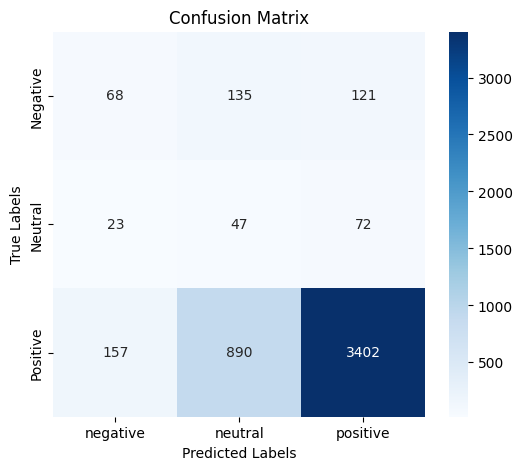

In [26]:
from textblob import TextBlob

# تابع برای انجام تحلیل احساس با TextBlob
def analyze_sentiment_textblob(text):
    if isinstance(text, str):
        # ایجاد یک شیء TextBlob برای تحلیل احساس
        blob = TextBlob(text)
        # محاسبه نمرات polarity و subjectivity
        return {'Polarity': blob.sentiment.polarity, 'Subjectivity': blob.sentiment.subjectivity}
    return {'Polarity': 0, 'Subjectivity': 0}

# اعمال تحلیل احساس با TextBlob بر روی ستون 'Content'
df['Sentiment_TextBlob'] = df['reviewText'].apply(analyze_sentiment_textblob)

# استخراج نمرات Polarity و Subjectivity از نتایج تحلیل
df['Polarity_Score_TextBlob'] = df['Sentiment_TextBlob'].apply(lambda x: x.get('Polarity', 0))
df['Subjectivity_Score_TextBlob'] = df['Sentiment_TextBlob'].apply(lambda x: x.get('Subjectivity', 0))

# اضافه کردن ستون 'textblob_SentimentAnalysis' بر اساس مقدار 'Polarity_Score_TextBlob'
def get_textblob_sentiment_analysis(polarity_score):
    if polarity_score > 0.1:
        return 'positive'
    elif polarity_score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['textblob_SentimentAnalysis'] = df['Polarity_Score_TextBlob'].apply(get_textblob_sentiment_analysis)

# نمایش دیتافریم بعد از تحلیل احساس با TextBlob
print(df[['reviewText', 'Polarity_Score_TextBlob', 'Subjectivity_Score_TextBlob', 'textblob_SentimentAnalysis']].head())

# محاسبه دقت (Accuracy)
accuracy = accuracy_score(df['label'], df['textblob_SentimentAnalysis'])

# محاسبه Recall
recall = recall_score(df['label'], df['textblob_SentimentAnalysis'], average='weighted')

# محاسبه F1-score
f1 = f1_score(df['label'], df['textblob_SentimentAnalysis'], average='weighted')

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# محاسبه ماتریس سردرگمی
conf_matrix = confusion_matrix(df['label'], df['textblob_SentimentAnalysis'])

# رسم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['negative', 'neutral', 'positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression 

Logistic Regression

Accuracy: 0.93
Recall: 0.93
F1-score: 0.92


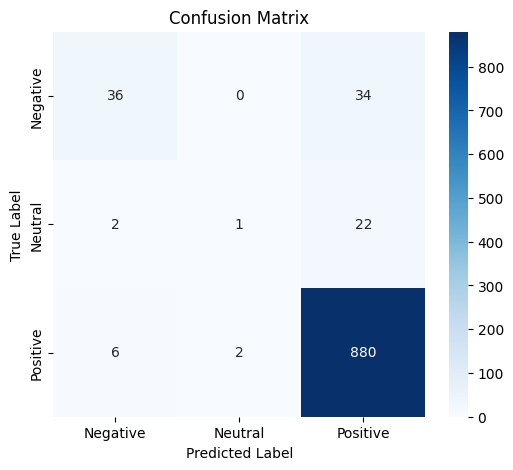

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from rich.console import Console

# اطمینان از عدم وجود مقادیر None یا NaN در ستون 'Content'
df['reviewText'] = df['reviewText'].fillna('')

# استخراج Uni-gram و Bi-gram با استفاده از CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2))  # Uni-gram (1) و Bi-gram (2)

# استفاده از Uni-gram و Bi-gram 
X = df[['Uni-grams', 'Bi-grams']]

# تبدیل متن‌ها به ویژگی‌های عددی
X = vectorizer.fit_transform(df['reviewText'])

# هدف (Sentiment_Class) از قبل ایجاد شده است
y = df['label']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل رگرسیون لجیستیک
model = LogisticRegression()

# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمایشی
y_pred = model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

console = Console()
console.print("[bold red]Logistic Regression[/bold red]")

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(y_test, y_pred)

# ترسیم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Random Forest

Random Forest

Accuracy: 0.91
Recall: 0.91
F1-score: 0.87


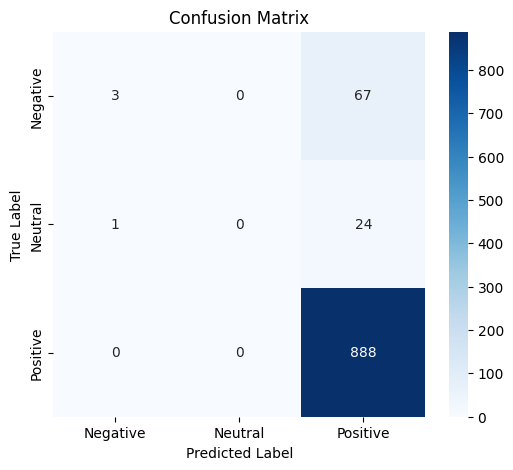

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# اطمینان از عدم وجود مقادیر None یا NaN در ستون 'Content'
df['reviewText'] = df['reviewText'].fillna('')

# استفاده از Uni-gram و Bi-gram 
X = df[['Uni-grams', 'Bi-grams']]

# تبدیل متن‌ها به ویژگی‌های عددی
X = vectorizer.fit_transform(df['reviewText'])

# هدف (Sentiment_Class) از قبل ایجاد شده است
y = df['label']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل جنگل تصادفی (Random Forest)
model = RandomForestClassifier(random_state=42)

# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمایشی
y_pred = model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

console = Console()
console.print("[bold red]Random Forest[/bold red]")

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(y_test, y_pred)

# ترسیم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Naive Bayes

Naive Bayes

Accuracy: 0.93
Recall: 0.93
F1-score: 0.91


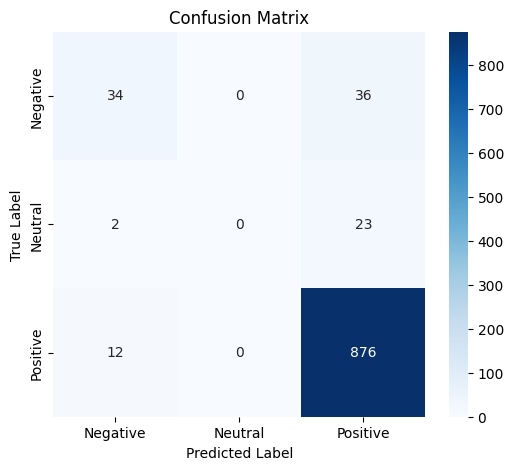

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# اطمینان از عدم وجود مقادیر None یا NaN در ستون 'Content'
df['reviewText'] = df['reviewText'].fillna('')

# استفاده از Uni-gram و Bi-gram 
X = df[['Uni-grams', 'Bi-grams']]

# تبدیل متن‌ها به ویژگی‌های عددی
X = vectorizer.fit_transform(df['reviewText'])

# هدف (Sentiment_Class) از قبل ایجاد شده است
y = df['label']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل Naive Bayes
model = MultinomialNB()

# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمایشی
y_pred = model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

console = Console()
console.print("[bold red]Naive Bayes[/bold red]")

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(y_test, y_pred)

# ترسیم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Ensemble Methods (VotingClassifier)

Ensemble(KNN, Decision Tree) Methods

Accuracy: 0.90
Recall: 0.90
F1-score: 0.90


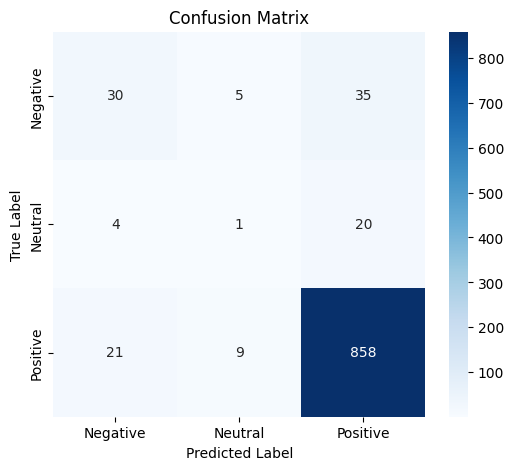

In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# اطمینان از عدم وجود مقادیر None یا NaN در ستون 'Content'
df['reviewText'] = df['reviewText'].fillna('')

# استفاده از Uni-gram و Bi-gram 
X = df[['Uni-grams', 'Bi-grams']]

# تبدیل متن‌ها به ویژگی‌های عددی
X = vectorizer.fit_transform(df['reviewText'])

# هدف (Sentiment_Class) از قبل ایجاد شده است
y = df['label']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل‌های KNN و Decision Tree
knn_model = KNeighborsClassifier(n_neighbors=3)
dt_model = DecisionTreeClassifier(random_state=42)

# ساخت مدل VotingClassifier که از مدل‌های KNN و Decision Tree استفاده می‌کند
ensemble_model = VotingClassifier(estimators=[('knn', knn_model), ('dt', dt_model)], voting='hard')

# آموزش مدل
ensemble_model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمایشی
y_pred = ensemble_model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

console = Console()
console.print("[bold red]Ensemble(KNN, Decision Tree) Methods[/bold red]")

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(y_test, y_pred)

# ترسیم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## VADAR using Worc2Vec

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AFERI/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                          reviewText VADER_SentimentAnalysis
0                                         No issues.                negative
1  Purchased this for my device, it worked as adv...                negative
2  it works as expected. I should have sprung for...                negative
3  This think has worked out great.Had a diff. br...                positive
4  Bought it with Retail Packaging, arrived legit...                positive

 **Performance Metrics:**
Metric         Value
----------------------
Accuracy    0.76
Recall      0.76
F1-Score    0.80


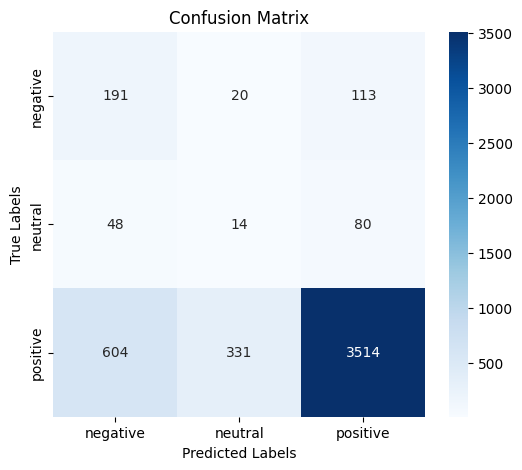

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# بارگذاری داده‌ها و دانلود مدل VADER
nltk.download('vader_lexicon')

# ایجاد شیء تحلیل احساس VADER
sia = SentimentIntensityAnalyzer()

# تابع برای تحلیل احساسات با استفاده از VADER
def analyze_sentiment(text):
    if isinstance(text, str):  # بررسی اینکه آیا ورودی از نوع رشته است
        sentiment_score = sia.polarity_scores(text)
        if sentiment_score['compound'] >= 0.05:
            return 'positive'
        elif sentiment_score['compound'] <= -0.05:
            return 'negative'
        else:
            return 'neutral'
    else:
        return 'neutral'  # در صورتی که ورودی از نوع رشته نباشد، احساسات به صورت پیش‌فرض "neutral" خواهد بود

# حذف مقادیر NaN و اعمال تحلیل احساس بر روی ستون 'reviewText' 
df['VADER_SentimentAnalysis'] = df['reviewText'].fillna('').apply(analyze_sentiment)

# نمایش نتایج تحلیل احساسات
print(df[['reviewText', 'VADER_SentimentAnalysis']].head())

# تعریف برچسب‌های واقعی
labels = ['negative', 'neutral', 'positive']

# تبدیل برچسب‌ها به مقادیر عددی برای مقایسه
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['Label_Num'] = df['label'].map(label_mapping)

# محاسبه معیارهای ارزیابی مدل
accuracy = accuracy_score(df['Label_Num'], df['VADER_SentimentAnalysis'].map(label_mapping))
recall = recall_score(df['Label_Num'], df['VADER_SentimentAnalysis'].map(label_mapping), average='weighted')
f1 = f1_score(df['Label_Num'], df['VADER_SentimentAnalysis'].map(label_mapping), average='weighted')

# نمایش معیارها در قالب جدول
print("\n **Performance Metrics:**")
print(f"{'Metric':<12}{'Value':>8}")
print(f"{'-'*22}")
print(f"{'Accuracy':<12}{accuracy:.2f}")
print(f"{'Recall':<12}{recall:.2f}")
print(f"{'F1-Score':<12}{f1:.2f}")

# محاسبه و نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(df['Label_Num'], df['VADER_SentimentAnalysis'].map(label_mapping), labels=[0, 1, 2])

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Textblob using Word2Vec

TextBlob Using Word2Vec

                                          reviewText  Polarity_Score_TextBlob  \
0                                             issues                 0.000000   
1  purchased device worked advertised phone memor...                 0.000000   
2  works expected sprung higher capacity think bi...                 0.129167   
3  think worked greathad diff bran gb card went s...                 0.250000   
4  bought retail packaging arrived legit orange e...                 0.386667   

   Subjectivity_Score_TextBlob TextBlob_Word2Vec_SentimentAnalysis  
0                        0.000                             neutral  
1                        0.000                             neutral  
2                        0.525                            positive  
3                        1.000                            positive  
4                        0.360                            positive  
Accuracy: 0.72
Recall: 0.72
F1-score: 0.78


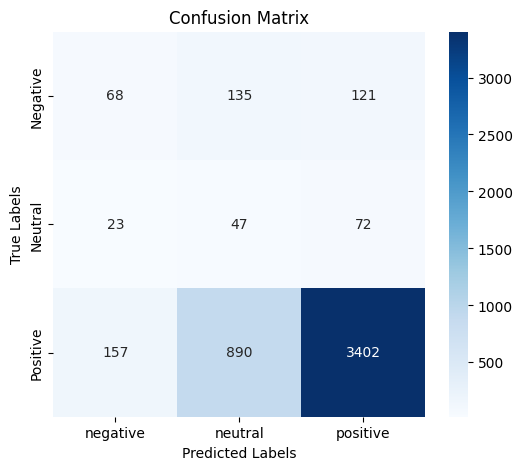

In [41]:
from textblob import TextBlob
from nltk.tokenize import word_tokenize
import numpy as np
import gensim
from gensim.models import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

console = Console()
console.print("[bold red]TextBlob Using Word2Vec[/bold red]")

# توکنایز کردن متن‌ها
sentences = df['reviewText'].apply(word_tokenize)

# آموزش مدل Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# تابع برای استخراج میانگین بردارهای کلمات یک جمله
def get_sentence_vector(sentence, model):
    sentence_vector = np.zeros(100)  # فرض می‌کنیم بردارهای کلمات طول 100 دارند
    words = word_tokenize(sentence)
    word_count = 0
    for word in words:
        if word in model.wv:
            sentence_vector += model.wv[word]
            word_count += 1
    if word_count > 0:
        sentence_vector /= word_count  # میانگین بردارهای کلمات جمله
    return sentence_vector

# تابع برای انجام تحلیل احساس با TextBlob
def analyze_sentiment_textblob_with_word2vec(text, model):
    if isinstance(text, str):
        # استخراج بردار معنایی جمله از مدل Word2Vec
        sentence_vector = get_sentence_vector(text, model)
        
        # ایجاد یک شیء TextBlob برای تحلیل احساس
        blob = TextBlob(text)
        # محاسبه نمرات polarity و subjectivity
        sentiment = blob.sentiment
        return {
            'Polarity': sentiment.polarity,
            'Subjectivity': sentiment.subjectivity,
            'Sentence_Vector': sentence_vector
        }
    return {'Polarity': 0, 'Subjectivity': 0, 'Sentence_Vector': np.zeros(100)}

# اعمال تحلیل احساس با TextBlob بر روی ستون 'Content' همراه با Word2Vec
df['Sentiment_TextBlob_Word2Vec'] = df['reviewText'].apply(lambda x: analyze_sentiment_textblob_with_word2vec(x, model))

# استخراج نمرات Polarity و Subjectivity از نتایج تحلیل
df['Polarity_Score_TextBlob'] = df['Sentiment_TextBlob_Word2Vec'].apply(lambda x: x.get('Polarity', 0))
df['Subjectivity_Score_TextBlob'] = df['Sentiment_TextBlob_Word2Vec'].apply(lambda x: x.get('Subjectivity', 0))

# اضافه کردن ستون 'TextBlob_Word2Vec_SentimentAnalysis' بر اساس مقدار 'Polarity_Score_TextBlob'
def get_textblob_sentiment_analysis(polarity_score):
    if polarity_score > 0.1:
        return 'positive'
    elif polarity_score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['TextBlob_Word2Vec_SentimentAnalysis'] = df['Polarity_Score_TextBlob'].apply(get_textblob_sentiment_analysis)

# نمایش دیتافریم بعد از تحلیل احساس با TextBlob و Word2Vec
print(df[['reviewText', 'Polarity_Score_TextBlob', 'Subjectivity_Score_TextBlob', 'TextBlob_Word2Vec_SentimentAnalysis']].head())

# محاسبه دقت (Accuracy)
accuracy = accuracy_score(df['label'], df['TextBlob_Word2Vec_SentimentAnalysis'])

# محاسبه Recall
recall = recall_score(df['label'], df['TextBlob_Word2Vec_SentimentAnalysis'], average='weighted')

# محاسبه F1-score
f1 = f1_score(df['label'], df['TextBlob_Word2Vec_SentimentAnalysis'], average='weighted')

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# محاسبه ماتریس سردرگمی
conf_matrix = confusion_matrix(df['label'], df['TextBlob_Word2Vec_SentimentAnalysis'])

# رسم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['negative', 'neutral', 'positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
